¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [46]:
#Importamos librerias
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import levene
import numpy as np

In [47]:
#importamos el archivo de games
df = pd.read_csv('games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# Paso 2. Preparación de datos

In [48]:
#Remplazo de nombres de las columnas a minusculas
df.columns = df.columns.str.lower()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [49]:
#Conversión los datos en los tipos necesarios.


df['user_score'] = df['user_score'].replace('tbd', np.nan)  #Se remplazó 'tbd' por NAN para poder transformar toda la columna user_score ya que esta columna son calificaciones que son numero

df['user_score'] = df['user_score'].astype(float) #Se remplazó 'tbd' por NAN para poder transformar toda la columna user_score ya que esta columna son calificaciones que son numero

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


## Trato de valores ausentes

Se puede ver que en algunas columnas obtenemos valores ausentes, estas vienen siendo la de año de lanzamiento, critic score, user score y rating. Estos valores ausentes pueden ser porque simplemente no se registro la información, estos datos se deciden dejar ausentes ya que entre ellos(las filas de cada videojuego) no hay una correlacion para que podamos sacar un dato clave como la media o mediana para poder llenarlos.

La unica columna que se procede a rellenar es el de años pues ese dato es importante la cantidad de juegos lanzados.

In [50]:
#Se checan valores ausentes
df.isna().sum()
 

df['year_of_release'].fillna(df['year_of_release'].mean(), inplace=True)  #se sustiuye valores ausentes de columna ano por la media


df.isna().sum() 

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [112]:
df['critic_score'].fillna('Unknown', inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales,user_score_convertido,score_promedio
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80.0,78.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,83.0,82.5
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0,80.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01,0.0,0.0


## Calculo de las ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocación de estos valores en una columna separada.

In [113]:
#Calculo de las ventas totales
#Se crea un nueva columna en el dataframe llamado ventas_totales
df['ventas_totales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales,user_score_convertido,score_promedio
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80.0,78.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,83.0,82.5
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0,80.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01,0.0,0.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Marlon! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que en estas columnas de 'critic_score'  mejor los completes con 'Unknown', puede ser en una columna duplicada para que puedas desarrollar los análisis posteriores. Además, te sugiero verificar si en el resto de las columnas no cuentas con datos ausentes que se deban ajustar.     

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante:</b> <a class="tocSkip"></a>
    
Se realiza el ajuste de completar los valores ausentes en el campo critic_score con el dato "Unknown"
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con los ajustes. 

</div>

# Paso 3 Analiza los datos

## Juegos lanzados por año. ¿Son significativos los datos de cada período?(Ver analisis en la siguiente grafica)

year_of_release
1980.000000       9
1981.000000      46
1982.000000      36
1983.000000      17
1984.000000      14
1985.000000      14
1986.000000      21
1987.000000      16
1988.000000      15
1989.000000      17
1990.000000      16
1991.000000      41
1992.000000      43
1993.000000      60
1994.000000     121
1995.000000     219
1996.000000     263
1997.000000     289
1998.000000     379
1999.000000     338
2000.000000     350
2001.000000     482
2002.000000     829
2003.000000     775
2004.000000     762
2005.000000     939
2006.000000    1006
2006.484616     269
2007.000000    1197
2008.000000    1427
2009.000000    1426
2010.000000    1255
2011.000000    1136
2012.000000     653
2013.000000     544
2014.000000     581
2015.000000     606
2016.000000     502
Name: name, dtype: int64


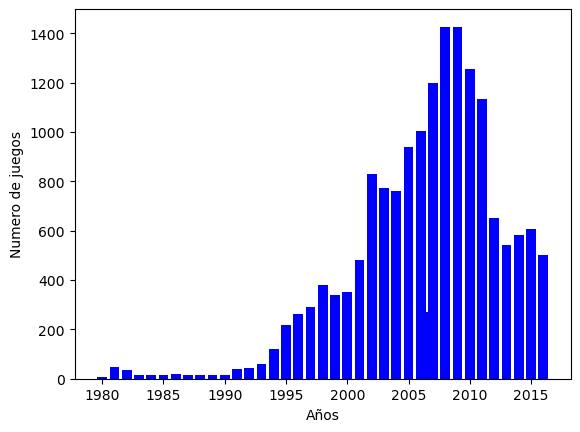

In [114]:
#Se cuenta videojuegos lanzados por año
juegos_lanzados_por_ano = df.groupby(['year_of_release'])['name'].count()

print(juegos_lanzados_por_ano)

#se crea una grafica de barras
plt.bar(juegos_lanzados_por_ano.index, juegos_lanzados_por_ano.values, color='blue') 
plt.xlabel('Años')
plt.ylabel('Numero de juegos')

plt.show()

Se puede ver en la grafica que  los datos dicen que el auge de videojuegos fue entre los años 2006 a 2011 pues la distribución de los datos tiende hacia esos datos siendo este el periodo mas significativo.

## Observa cómo varían las ventas de una plataforma a otra. 

    platform  year_of_release  ventas_totales
143      PS2           2004.0          211.81
214      Wii           2009.0          206.97
141      PS2           2002.0          205.38
142      PS2           2003.0          184.31
213      Wii           2008.0          171.32
..       ...              ...             ...
101       PC           1988.0            0.03
127     PCFX           1996.0            0.03
11       3DO           1994.0            0.02
27        DS           1985.0            0.02
25        DC           2007.0            0.02

[254 rows x 3 columns]


Text(0, 0.5, 'Ventas')

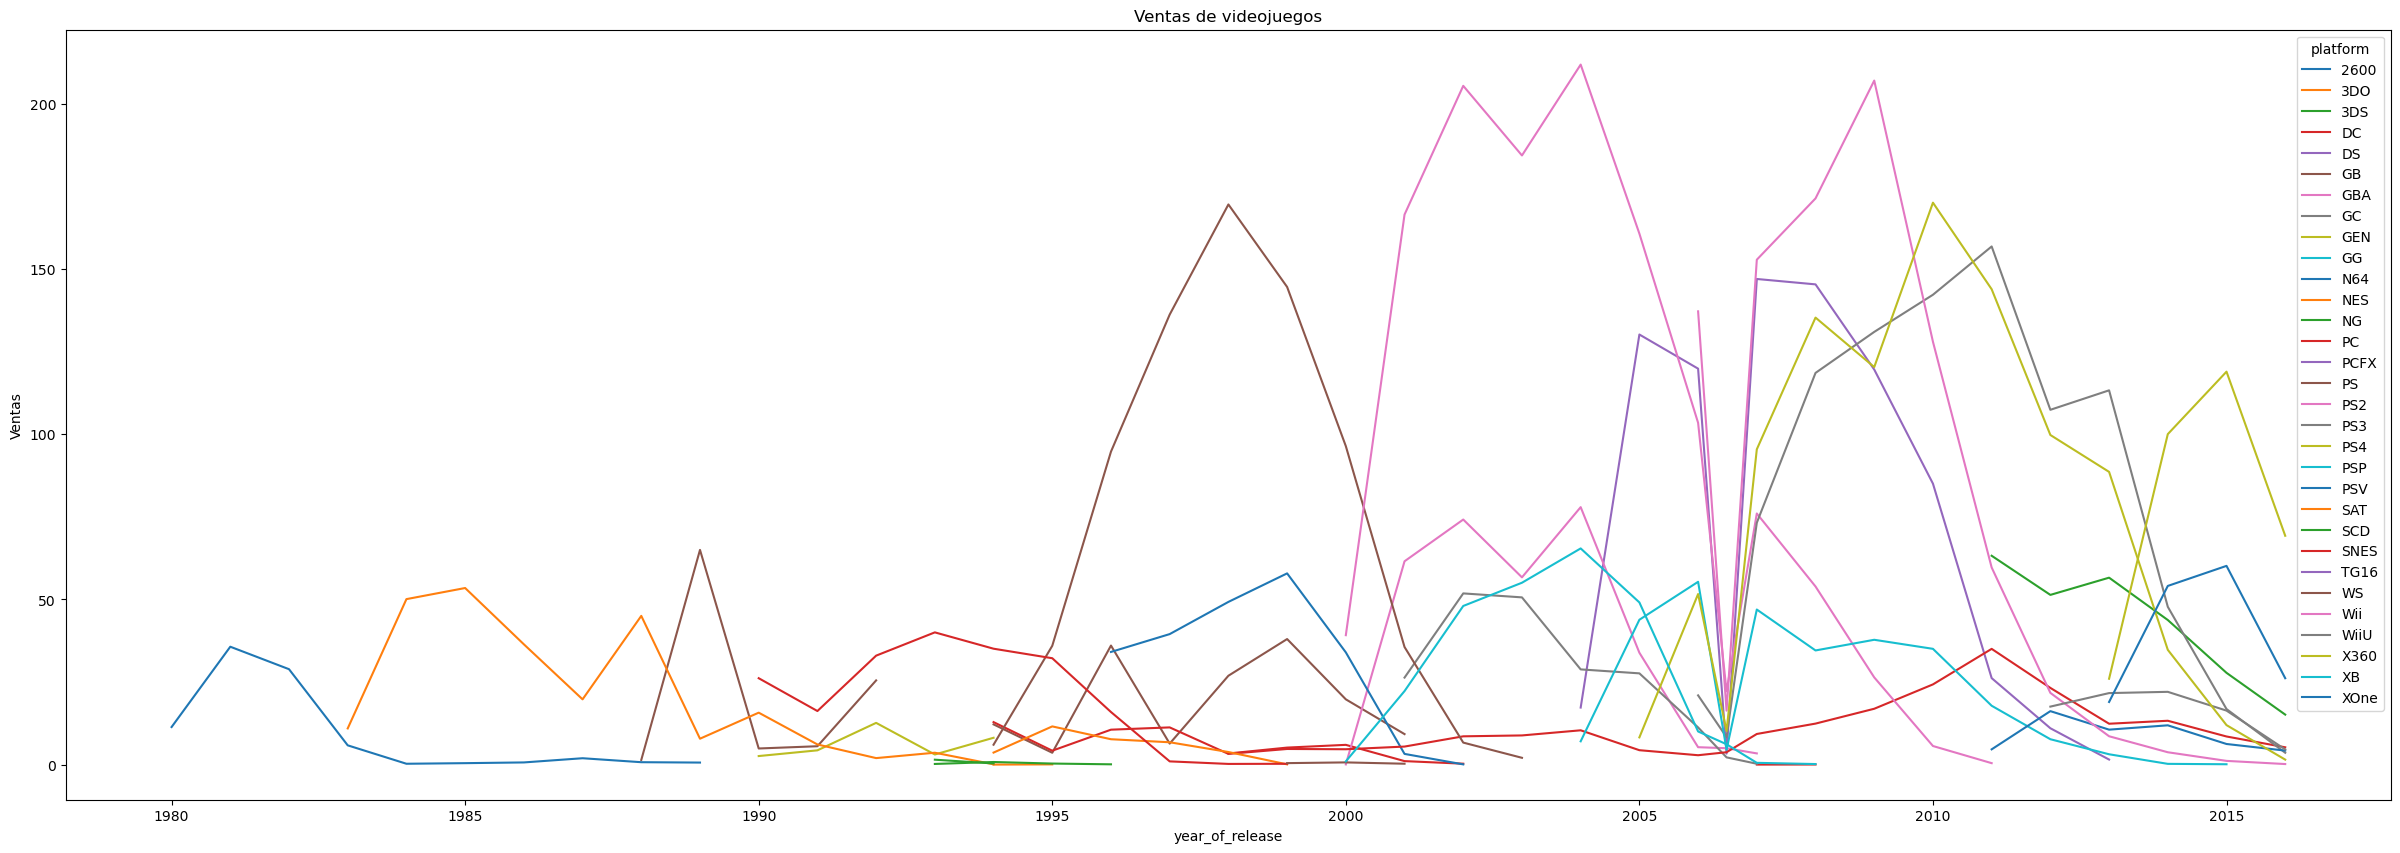

In [115]:
#Variacion ventas entre consolas

ventas_totales_por_consola = df.groupby(['platform', 'year_of_release'])['ventas_totales'].sum().reset_index() #ventas por consola por año

print(ventas_totales_por_consola.sort_values(by='ventas_totales', ascending = False)) 


graficoventas = ventas_totales_por_consola.pivot_table(values='ventas_totales', index='year_of_release', columns='platform', aggfunc='sum')

graficoventas.plot(kind='line', figsize=(30, 10))
plt.title('Ventas de videojuegos')
plt.xlabel('year_of_release')
plt.ylabel('Ventas')

En el grafico se observa la lista de consolas desde el año 1980 hasta 2016 donde claramente se observa que las consolas con mayor ventas tuvieron un periodo fuerte entre los años 1995 a 2016. A partir del año 1995 donde se comienza a ver una especie de campana de gauss(campana de distribución normal) en los datos.

## Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [116]:
# Se obtiene las 10 mayores ventas por plataforma
maxtop10ventas_totales_por_consola = df.groupby('platform').ventas_totales.sum().sort_values(ascending=False)[:10]

print(maxtop10ventas_totales_por_consola)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: ventas_totales, dtype: float64


Text(0, 0.5, 'Ventas')

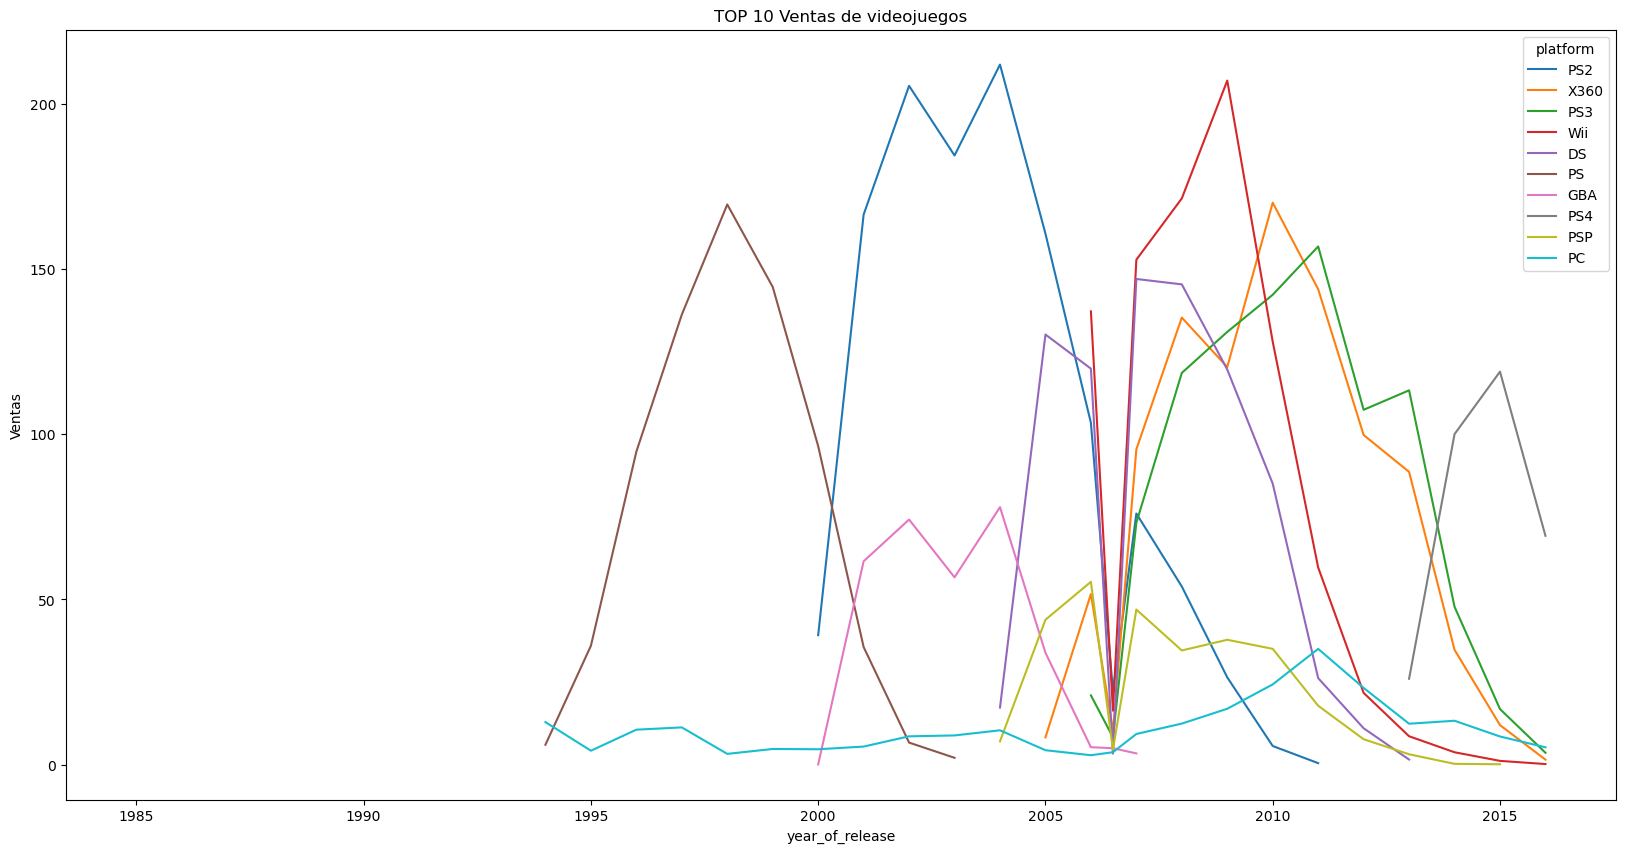

In [117]:
#Se realiza grafico de distribución de las mayores 10 ventas

ventas_totales_por_consola.pivot_table(values='ventas_totales', index='year_of_release', columns='platform', aggfunc='sum')

top10ventas = graficoventas[['PS2', 'X360', 'PS3', 'Wii', 'DS','PS', 'GBA', 'PS4', 'PSP', 'PC']]

top10ventas.plot(kind='line', figsize=(20, 10))
plt.title('TOP 10 Ventas de videojuegos')
plt.xlabel('year_of_release')
plt.ylabel('Ventas')

En la grafica se muestra que las consolas como PS, PS2 llegaron a ser las más vendidas en su debido momento, la primera fue desde 1994 a 2000 y la segunda fue del 2000 al 2005. Esta ultima a partir del año 2005, se vio superada por las consolas de Nintendo como lo son DS y WII, despues llegaron las de nintendo donde tomaron la cima como fue XBOX360 Y PS3.

## Tiempo en aparecer una consola

In [118]:
#Se obtiene año menor de cada consola (año de lanzamiento)
min_year = df.groupby('platform')['year_of_release'].min().sort_values(ascending=True).reset_index()

#Se obtiene una diferencia del año menor de la consala y el año menor de la que apareció despues (años en aparecer una nueva)
min_year['release_gap'] = min_year['year_of_release'].diff()

#Se obtiene media del año ede aparición
print('El tiempo promedio en aparecer una consola nueva es de ', min_year['release_gap'].mean(), 'años')

El tiempo promedio en aparecer una consola nueva es de  1.1 años


## Tiempo en desaparecer una nueva consola

In [119]:
#Año menor de cada consola(año de lanzamiento)
min_year = df.groupby('platform')['year_of_release'].min()

#Año mayor de cada consola(año de ultimo juego)
max_year = df.groupby('platform')['year_of_release'].max()

#Resta entre su ano de lanzamiento y ultimo juego de cada consola y promedio de todas estas
tiempo_vida = (max_year - min_year).mean() 

print('El tiempo de vida de una consola es de ', tiempo_vida, 'años')

El tiempo de vida de una consola es de  8.902233310972758 años


## Determina para que periodo debes de tomar los datos, los datos deben permitir construir un modelo para 2017

Para la toma de datos se lo hará a partir de 1995 ya que a esa fecha fue cuando comenzaron las ventas a subir empezando a formar una distribución normal por lo que la mayoria de datos tiende hacia esa epoca(1995 a 2016)

## Que plataformas son los lideres de ventas cuales crecen y cuales se reducen

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: ventas_totales, dtype: float64


Text(0, 0.5, 'Ventas')

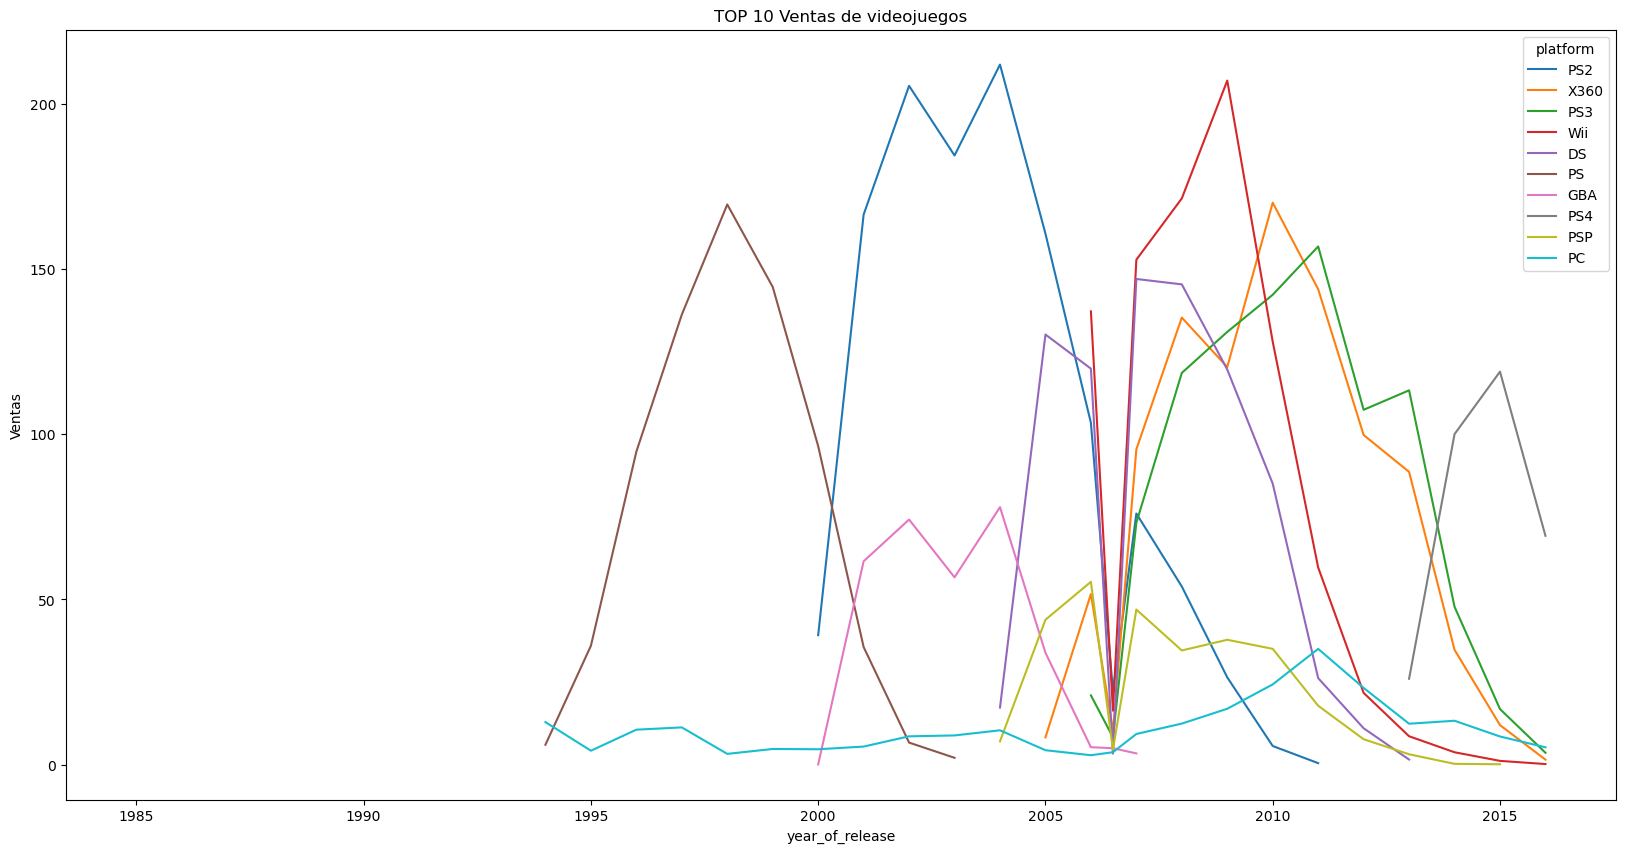

In [120]:
print(maxtop10ventas_totales_por_consola)

top10ventas.plot(kind='line', figsize=(20, 10))
plt.title('TOP 10 Ventas de videojuegos')
plt.xlabel('year_of_release')
plt.ylabel('Ventas')

## Que plataformas son los lideres de ventas cuales crecen y cuales se reducen?

* Las plataformas lideres son ps2, x360, ps3 y wii.

* Las plataformas que tienen crecimeinto es ps, ps2, wii, ps3 y xbox360

* Las plataformas que se reducen son psp, pc y ps4

## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Platform: PS2
count    2161.000000
mean        0.581106
std         1.137927
min         0.000000
25%         0.080000
50%         0.230000
75%         0.560000
max        20.810000
Name: ventas_totales, dtype: float64
Platform: X360
count    1262.000000
mean        0.769746
std         1.615674
min         0.010000
25%         0.110000
50%         0.280000
75%         0.757500
max        21.820000
Name: ventas_totales, dtype: float64
Platform: PS3
count    1331.000000
mean        0.705973
std         1.391749
min         0.000000
25%         0.110000
50%         0.270000
75%         0.750000
max        21.050000
Name: ventas_totales, dtype: float64
Platform: Wii
count    1320.000000
mean        0.687508
std         3.126609
min         0.010000
25%         0.080000
50%         0.190000
75%         0.482500
max        82.540000
Name: ventas_totales, dtype: float64
Platform: DS
count    2151.000000
mean        0.374765
std         1.426451
min         0.010000
25%         0.050000
50%  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Wii'),
  Text(2, 0, 'DS'),
  Text(3, 0, 'X360'),
  Text(4, 0, 'PS3'),
  Text(5, 0, 'PS2'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PS4'),
  Text(8, 0, 'PS'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'PSP')])

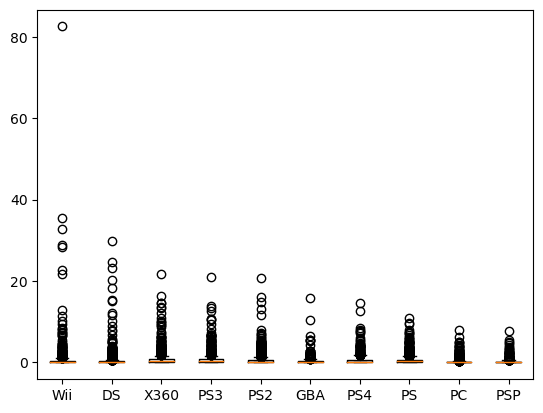

In [121]:
consolastop = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

for consola in consolastop:
    filtered_df = df[df['platform'] == consola]  # Filter DataFrame for the current console
    descripcion_ventas = filtered_df['ventas_totales'].describe() 
    print(f"Platform: {consola}")
    print(descripcion_ventas)


plataformas_filtradas = [platform for platform in df['platform'].unique() if platform in consolastop]
# Crear el diagrama de caja solo para las plataformas filtradas
plt.boxplot([df[df['platform'] == platform]['ventas_totales'] for platform in plataformas_filtradas],
            labels=plataformas_filtradas)

# Configurar el gráfico
plt.xticks(rotation=0)

Se puede ver que el promedio de ventas de cada consola es similar siendo menos del millon de ventas, sin embargo lo que los diferencia es la distribución de los datos pues muchos contienen datos atipicos muy extremos, es decir el promedio es parecido pero la desviación es diferente.

## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales,user_score_convertido,score_promedio
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,80.0,78.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,83.0,82.5
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0,80.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01,0.0,0.0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01,0.0,0.0


                ventas_totales  score_promedio
ventas_totales        1.000000        0.295053
score_promedio        0.295053        1.000000


Text(0.5, 1.0, 'Correlacion ventas-score ps2')

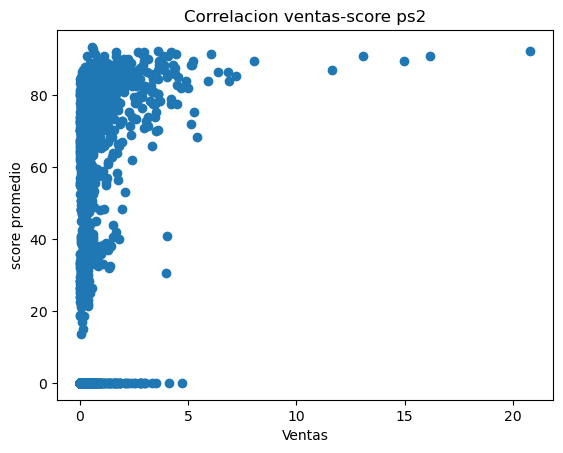

In [122]:
#Se convierte user score para promediar mejor con critic score
df['user_score_convertido'] = df['user_score'] * 10
display(df) 

#Se obtiene calificación promedio entre la columna de critica y user_score
df['score_promedio'] = df[['user_score_convertido', 'critic_score']].mean(axis=1)

#Se hace correlacón entre ventas y score entre de ps2
correlation = df[df['platform'] == 'PS2'][['ventas_totales', 'score_promedio']].corr()
print(correlation)
plt.scatter(df[df['platform'] == 'PS2']['ventas_totales'] , df[df['platform'] == 'PS2']['score_promedio'])
plt.xlabel('Ventas')
plt.ylabel('score promedio')
plt.title('Correlacion ventas-score ps2')

La consola para la cual se hizo un grafico correlación fue PS2, donde se puede apreciar que la correlación no es fuerte ya que es de 0.32 de coeficiente, ademas se puede notar en la grafica ya que el tener mejor calificacion no equivale a mejores ventas ni lo contrario(menor ventas mejor calificación)

## Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas. 

                ventas_totales  score_promedio
ventas_totales        1.000000        0.049284
score_promedio        0.049284        1.000000


Text(0.5, 1.0, 'Correlacion ventas-score PC')

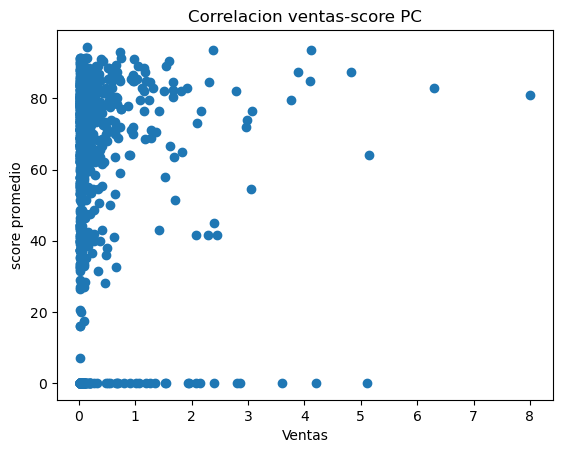

In [123]:
correlation = df[df['platform'] == 'PC'][['ventas_totales', 'score_promedio']].corr() #Se hace correlacón entre ventas y score entre de ps2
print(correlation)
plt.scatter(df[df['platform'] == 'PC']['ventas_totales'] , df[df['platform'] == 'PC']['score_promedio'])
plt.xlabel('Ventas')
plt.ylabel('score promedio')
plt.title('Correlacion ventas-score PC')


De igual forma al hacer la correlación de ventas con score en la plataforma PC vemos que esta no es fuerte pues nos da un coeficiente de 0.127 por lo que nuevamente podemos decir que el score no es directamente proporcional a las ventas.

## Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: ventas_totales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

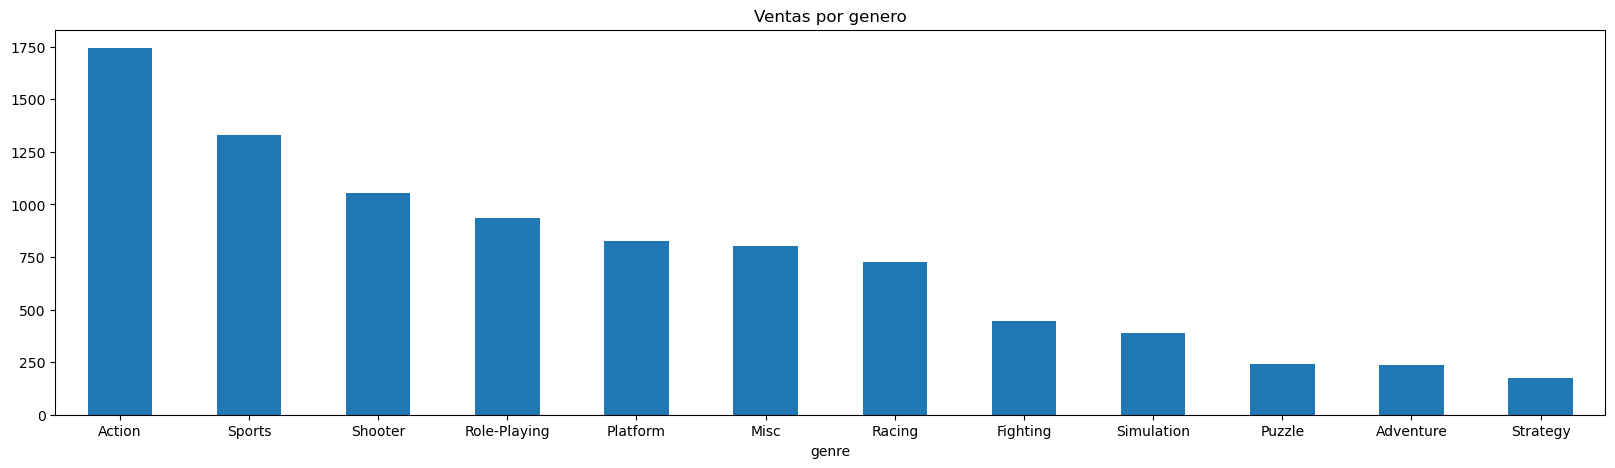

In [124]:
ventas_por_genero = df.groupby('genre').ventas_totales.sum().sort_values(ascending=False)  #Se hace groupby por ventas por genero

print(ventas_por_genero)

ventas_por_genero.plot(kind='bar', figsize=(20, 5))
plt.xticks(rotation=0)
plt.title('Ventas por genero')
plt.show

* Los videojuegos más rentables son los de acción, deportes y disparos con 1744.17, 1331.27 y 1052.45 millones de ventas respectivamente. 
* Los menos rentables son los de Rompecabezas, aventura y estrategia con 242.57, 237.59 y 174.23 millones de ventas respectivamente 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>

# Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

## Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [125]:
#Las cinco plataformas principales por region
def consolas_populares(region):
    return df.groupby('platform')[region].sum().sort_values(ascending=False)[:5]

top5_na = 'na_sales'
top5_eu = 'eu_sales'
top5_japan = 'jp_sales'

print('Las 5 consolas mas populares de NA son', consolas_populares(top5_na))
print()
print('Las 5 consolas mas populares de EU son', consolas_populares(top5_eu))
print()
print('Las 5 consolas mas populares de JP son', consolas_populares(top5_japan))


Las 5 consolas mas populares de NA son platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Las 5 consolas mas populares de EU son platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Las 5 consolas mas populares de JP son platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Se ve que que entre las tres regiones varian un poco los videojugos que estan sin embargo vemos que el que mas se repite en el top es PS2
siendo este el unico que esta en el top 3 en cada región, podemos asumir con esto que tiene logica que PS2 haya sido la plataforma más vendida
según nuestro calculo anteriormente realizado.

## Los cinco géneros principales. Explica la diferencia.

In [126]:
#Las cinco generos principales
def consolas_populares(region):
    return df.groupby('genre')[region].sum().sort_values(ascending=False)[:5]

top5_na = 'na_sales'
top5_eu = 'eu_sales'
top5_japan = 'jp_sales'

print('Las 5 generos mas populares de NA son', consolas_populares(top5_na))
print()
print('Las 5 generos mas populares de EU son', consolas_populares(top5_eu))
print()
print('Las 5 generos mas populares de JP son', consolas_populares(top5_japan))

Las 5 generos mas populares de NA son genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Las 5 generos mas populares de EU son genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Las 5 generos mas populares de JP son genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Se puede ver que los generos principales en cada región varian entre las regiones pero los que destacan son Sports y Action pues estos son los unicos en estar en el top 3 en todas las regiones, por lo que esto afirma más la grafica que se hizo anteriormente donde el top generos mas vendidos fue Action y Sports.

## Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

In [127]:
def consolas_populares(rating):
    return df.groupby('rating')[rating].sum().sort_values(ascending=False)[:5]

top5_na = 'na_sales'
top5_eu = 'eu_sales'
top5_japan = 'jp_sales'

print('Las ratings mas populares de NA son', consolas_populares(top5_na))
print()
print('Las 5 ratings mas populares de EU son', consolas_populares(top5_eu))
print()
print('Las 5 ratings mas populares de JP son', consolas_populares(top5_japan))

Las ratings mas populares de NA son rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

Las 5 ratings mas populares de EU son rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

Las 5 ratings mas populares de JP son rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   Solamente te recomiendo en esta sección también agregar gráficas que ayuden a visualizar los resultados.

</div>

Vemos que las clasificaciones ESRB si afectan en las ventas pues coincide que en el top 3 de ventas sean este E, T y M en las tres regiones.

# Paso 5. Prueba las siguientes hipótesis:

* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

* Cómo formulaste las hipótesis nula y alternativa.

* Qué criterio utilizaste para probar las hipótesis y por qué.

## Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [128]:
#Usamos datos no nulos para hacer nuestras hipotesis
dfisnotnan = df[~df['user_score'].isna()]

datos_xbox = dfisnotnan[dfisnotnan['platform'] == 'XOne']['user_score']

datos_pc = dfisnotnan[dfisnotnan['platform'] == 'PC']['user_score']

alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis
# realizar una prueba
results = st.ttest_ind(datos_xbox, datos_pc, equal_var=False)

# extraer el valor p
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.0005315801015576501
Rechazamos la hipótesis nula



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre plataformas.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Se agrega el atributo equal_var=False en la función ttest_ind
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con los ajustes. 

</div>

Se usa una prueba de hipotesis de igualdad de medias donde H0: Xone=PC y H1: Xone =/=PC

Se rechaza la hipotesis nula ya que p value es menor al alpha de 0.05 por lo que esto quiere decir que el promedio de calificaciones para PC y para XOne son diferentes.

## Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [130]:
datos_action = dfisnotnan[dfisnotnan['genre'] == 'Action']['user_score']

datos_sports = dfisnotnan[dfisnotnan['genre'] == 'Sports']['user_score']

alpha = 0.05  # el nivel de significancia estadística crítica

#varianza datos_action
var_dat_act = np.var(datos_action)

#varianza datos_sports
var_dat_spo = np.var(datos_sports)

print('valor varianza act: ',var_dat_act)
print('valor varianza spo: ',var_dat_spo)

#test levene
statistic, p_value = levene(datos_action, datos_sports)
print()
print("Levene's test statistic: ",statistic)
print("p-value: ",p_value)
print()

# comparar el valor p con el umbral
if (p_value < alpha):
    print("Se rechaza la hipotesis nula, varianzas son significativamente diferentes.")
else:
    print("No se puede rechazar la hipotesis nula, varianzas no son significativamente diferentes")


#test ind
print()
results = st.ttest_ind(datos_action, datos_sports, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No hay suficiente evidencia para rechazar la hipotesis nula')




valor varianza act:  13.450089252478767
valor varianza spo:  13.288893175242672

valor resultado act:  LeveneResult(statistic=1.8449043765508706, pvalue=0.17443082513187333)
valor resultado spo:  LeveneResult(statistic=12.041263382497704, pvalue=0.0005242010760949489)

Rechazamos la hipótesis nula


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estra pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales.    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Se calcula la varianza de género acción y deportes. Además, se genera test de Levene. Finalmente, se demuestra el rechazo de hipotesis nula.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con los ajustes. Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro de

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Se agregar el test ind.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con los ajustes. 

</div>

Se usa una prueba de hipotesis de igualdad de medias donde H0: Action=Sports Y h1: Action =/=Sports

No podemos rechazar la hipotesis nula ya que p value es mayor al alpha de .05 por lo que esto quiere decir  que el de calificación entre sports y action es diferente

# Conclusión general:

La mayor venta de videojuegos fue entre lo años 2006 y 2011 pues en esta época hubo un boom por consolas como lo fue ps2 que ha sido la consola con las mayores ventas en la historia, seguido de x360 y ps3 que están dentro de la misma época, por lo que si queremos hacer una predicción para los próximos años lo ideal es tomar estos datos que es donde la mayoría caen en nuestra curva de normalidad.

A la vez se descubrió que la calificación que dan los usuarios y críticas a los videojuegos no esta correlacionado al numero de ventas que tengamos, es decir que no podemos basarnos en los videojuegos con mayor calificación y analizarlos si quisiéramos hacer un proyecto para para obtener mayores ventas.

Otro dato es que los videojuegos más rentables son los de la categoría accón y deportes pues estos son vendidos casi de igual manera en las tres regiones, además los dos recibieron calificaciones similares según nuestra hipótesis estadistica

También se vio que el rating mas popular en todas las regiones son los E pues tiene lógica al ser Everyone que significa que es para toda las edades, por lo que más población podría comprar un juego E


En conclusión si quisiéramos hacer un proyecto para mayor venta de videojuegos en los próximos años debemos de tomar lo siguiente

* Tomar datos históricos de 2006 en adelante para el proyecto

* Dejar de un lado que un videjuego mejor calificado es igual a mas ventas(no hay correlación alguna)

* Enfocarse más en los juegos de acción  y deportes, ambos son igual de rentables y están en el top en todas las regiones

* Enfocarse en los videojuegos rating E pues es el top de ventas en todas las regiones



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

* Se agrega los valores ausentes con Unknown
* Se aplica test de Levene en las varianzas para los generos acción y deportes
</div>

Estimado, se encuentra modificado lo solicitado. Además, el error que no mostraba el dataframe fue solventado. Finalmente, no refleja ningún comentario en esta nueva revisión

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con los ajustes. Que sigas disfrutando los siguientes cursos!

</div>